features size: (500, 2)
labels size: (500,)


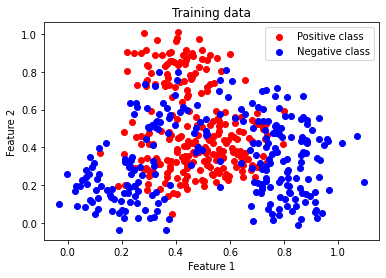

In [1]:
# Import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
%matplotlib inline

# Load and display the training data
features = np.load("features.npy")
labels = np.load("labels.npy")
print("features size:", features.shape)
print("labels size:", labels.shape)

# Extract features for both classes
pos = labels == 1  # array of booleans, with pos[i] = True if labels[i] == 1
features_pos = features[pos]  
neg = labels != 1  # array of booleans, with neg[i] = True if labels[i] != 1
features_neg = features[neg]


# Display data
fig, ax = plt.subplots()
ax.scatter(features_pos[:, 0], features_pos[:, 1], c="red", label="Positive class")
ax.scatter(features_neg[:, 0], features_neg[:, 1], c="blue", label="Negative class")
ax.set_title("Training data")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()

plt.show()

In [3]:
# Train the SVM classifier with arbitrary hyperparameters
cost = 1
gamma = 1

# Train the SVM classifier.
svm = SVC(C=cost, kernel='rbf', gamma=gamma)
svm.fit(features, labels)

# Predict labels.
predicted_labels = svm.predict(features)

# Compute the error.
error = sum(labels != predicted_labels)
print("Prediction error:", error)

Prediction error: 98


In [4]:
# Define values for the cost and precision parameters
def logsample(start, end, num):
    return np.logspace(np.log10(start), np.log10(end), num, base=10.0)

num_gammas = 20
num_costs = 20
gamma_range = logsample(1e-1, 1e3, num_gammas)
cost_range = logsample(1e-1, 1e3, num_costs)

In [5]:
# Compute the cross-validation error for each parameter combination
K = 10  # number of folds for cross validation
kf = KFold(n_splits=K)
cv_error = np.zeros((num_gammas, num_costs))  # error matrix

for i in range(num_gammas):
    for j in range(num_costs):
        svm = SVC(C=cost_range[j], kernel='rbf', gamma=gamma_range[i])
        error = 0
        for train, test in kf.split(features):
            svm.fit(features[train], labels[train])
            predicted_kfold = svm.predict(features[test])
            error = error + sum(labels[test] != predicted_kfold)
        cv_error[i, j] = error/K

# Find gamma and cost giving the smallest error
a = np.argwhere(cv_error == np.min(cv_error))
cost = cost_range[a[0,1]]
gamma = gamma_range[a[0,0]]

# Train the SVM classifier using these parameters
svm = SVC(C=cost, kernel='rbf', gamma=gamma)
svm.fit(features, labels)
support_vectors = svm.support_vectors_

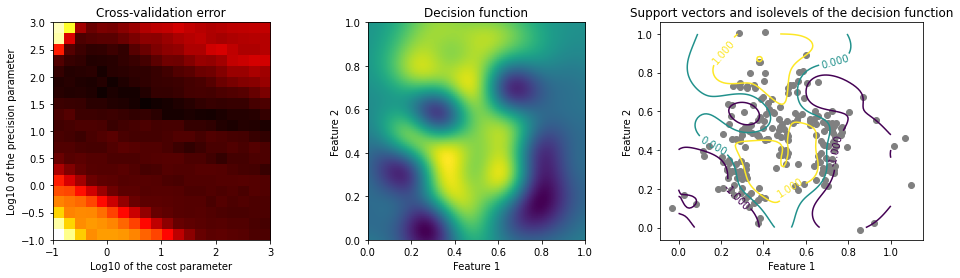

In [6]:
# Display cross-validation results and the decision function

# Sample points on a grid
num_points = 100
x_rng = np.linspace(0, 1, num_points)
y_rng = np.linspace(0, 1, num_points)
grid_x, grid_y = np.meshgrid(x_rng, y_rng)

# Evaluate decision function for each point
xy_list = np.column_stack((grid_x.flat, grid_y.flat))
values = svm.decision_function(xy_list)
values = values.reshape((num_points, num_points))

# Display
fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 3, 1)
ax.set_title("Cross-validation error")
ax.set_xlabel("Log10 of the cost parameter")
ax.set_ylabel("Log10 of the precision parameter")

ax.imshow(cv_error, cmap ='hot', extent=[-1, 3, -1, 3], origin='lower')

ax = fig.add_subplot(1, 3, 2)
ax.set_title("Decision function")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.imshow(values, extent=[0, 1, 0, 1], origin='lower')

ax = fig.add_subplot(1, 3, 3)
ax.set_title("Support vectors and isolevels of the decision function")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

contour_values = [-1, 0, 1]
contPlt = ax.contour(grid_x, grid_y, values, contour_values)
ax.clabel(contPlt)
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], color = 'grey')

plt.show()

In [9]:
# Compute the generalization error

# Load the testing data
test_features = np.load("test_features.npy")
test_labels = np.load("test_labels.npy")
print(test_features.shape)
print(test_labels.shape)

svm = SVC(C=cost, kernel='rbf', gamma=gamma)
svm.fit(features, labels)
predicted_test = svm.predict(test_features)
error = sum(test_labels != predicted_test)
print("Number of errors in the testing set: ", error)
print("Error percentage in the testing set: ", error/test_labels.shape)

(500, 2)
(500,)
Number of errors in the testing set:  90
Error percentage in the testing set:  [0.18]
